In [2]:
#import libraries
import pandas as pd
import numpy as np 

In [4]:
add = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
df = pd.read_csv(add)

In [5]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
a= [1,2,3,4,5,6]
b = [113,21,34]
a_exetend_b = a.extend(b)


In [7]:
a

[1, 2, 3, 4, 5, 6, 113, 21, 34]

## number 1 == to A.extend(B)

In [9]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## number 2 == ## np.identity(3)

In [10]:
df.groupby('fuel_type_code_pudl', as_index=False)['fuel_qty_burned'].mean()

,fuel_type_code_pudl,fuel_qty_burned
0,coal,1.903473e+06
1,gas,4.843183e+06
2,nuclear,5.454838e+06
3,oil,6.311677e+04
4,other,2.948137e+06
5,waste,1.171914e+05


## number 3. == oil has the highest average fuel burned 

In [13]:
df['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

## 75th percentile is 17.0 and std is 10.6

In [22]:
skewness = df['fuel_qty_burned'].skew()
kurtosis = df['fuel_qty_burned'].kurt()

print(f'fuel_qty_burned skewness is {skewness} and kurtosis is {kurtosis} ')

fuel_qty_burned skewness is 15.851495469109503 and kurtosis is 651.3694501337732 


## skewness and kurtosis are 15.5 and 651 respectively 

In [25]:
nans = df.isnull()
for col in nans.columns.values.tolist():
    print(col)
    print (nans[col].value_counts())
    print("") 

record_id
False    29523
Name: record_id, dtype: int64

utility_id_ferc1
False    29523
Name: utility_id_ferc1, dtype: int64

report_year
False    29523
Name: report_year, dtype: int64

plant_name_ferc1
False    29523
Name: plant_name_ferc1, dtype: int64

fuel_type_code_pudl
False    29523
Name: fuel_type_code_pudl, dtype: int64

fuel_unit
False    29343
True       180
Name: fuel_unit, dtype: int64

fuel_qty_burned
False    29523
Name: fuel_qty_burned, dtype: int64

fuel_mmbtu_per_unit
False    29523
Name: fuel_mmbtu_per_unit, dtype: int64

fuel_cost_per_unit_burned
False    29523
Name: fuel_cost_per_unit_burned, dtype: int64

fuel_cost_per_unit_delivered
False    29523
Name: fuel_cost_per_unit_delivered, dtype: int64

fuel_cost_per_mmbtu
False    29523
Name: fuel_cost_per_mmbtu, dtype: int64



##  only column [fuel_unit] has missing values 

In [27]:
df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [32]:
import matplotlib
import seaborn as sns

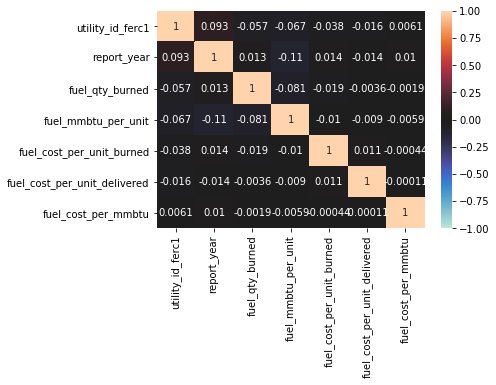

In [34]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

## least 2nd and 3rd correlation are fuel_mmbtu_per_unit and fuel_cost_per_unit_delivered